In [2]:
import histogram_manager as hm
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scienceplots

plt.style.use(['science', 'notebook'])

%jsroot on
%config InlineBackend.figure_format = 'retina'

Welcome to JupyROOT 6.28/00


In [3]:
hists = hm.HistogramManager("../output/stage0_output_angulardist.root")
hists

<HistogramManager(filename='../output/stage0_output_angulardist.root', total_objects=192)>


Name         | Type  
---------------------
hEgam        | 📂 TH1D
hEn          | 📂 TH1D
hEn_gate5161 | 📂 TH1D
hEn_gatebkg  | 📂 TH1D
hEn_gtzero   | 📂 TH1D
hEn_zero     | 📂 TH1D

In [4]:
# hEn_d1 = hists.get("hEn_d1")
# hEn_d1.GetXaxis().SetRangeUser(0.5,1)

# c = ROOT.TCanvas()
# hEn_d1.Draw()
# c.Draw()

In [5]:
# hEgam_d1 = hists.get("hEgam_d1")
# # hEgam_d1.GetXaxis().SetRangeUser(1500,1700)

# c = ROOT.TCanvas()
# # hEgam_d1.Draw()
# hEgam_d1.SetLineColor(ROOT.kBlue)
# hEgam_d1_bkg = hEgam_d1.ShowBackground(20, "same")
# hEgam_d1_bkgsub = hEgam_d1.Clone() - hEgam_d1_bkg.Clone()
# hEgam_d1_bkgsub.Draw()
# hEgam_d1_bkgsub.SetLineColor(ROOT.kBlack)
# c.Draw()

# hEgam_d1_bkgsub.Integral(hEgam_d1_bkgsub.FindBin(1550),hEgam_d1_bkgsub.FindBin(1650))


In [6]:
# hEgam = hists.get("hEgam")

# integral = []
# for key, hist in hEgam.items():
#     hist.GetXaxis().SetRangeUser(1500,1700)
#     hist_bkg = hist.ShowBackground()
#     hist_bkgsub = hist - hist_bkg
#     integral.append(hist.Integral(hist.FindBin(1550),hist.FindBin(1603)))



In [7]:
hEgam_dict = hists.get("hEgam")

region1 = [482.3, 492.9]
region2 = [791.6, 821.1]
region3 = [1560, 1621]
region4 = [2480, 2544]

gamma_rays = {5161:[]}


In [8]:
region1 = [[0,0],[448.6,495],[479.9,494.0],[454.6,493.5],[0,0],[0,0],[455.0,494.5],[454.5,493.6],[0,0],[453.0,494.5],
           [445.0,493.7],[454.5,494.3],[0,0],[444.4,496.1],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
           [0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[468.5,492.7],[0,0],[447.4,493.7],
           [0,0],[0,0],[0,0]]

region2 = [[0,0],[777.9,831.7],[781.0,830.9],[781.0,834.8],[0,0],[0,0],[781.4,832.8],[780.4,839.5],[0,0],[783.8,835.7],
           [773.1,841.2],[782.5,833.3],[0,0],[773.7,836.9],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
           [0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[779.1,828.9],[0,0],[780.2,835.1],
           [0,0],[0,0],[0,0]]

region3 = [[0,0],[1520,1640],[1526,1620],[1528,1624],[0,0],[0,0],[1517,1621],[1518,1621],[0,0],[1518,1629],
           [1525,1618],[1525,1618],[0,0],[1533,1624],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
           [0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1535,1618],[0,0],[1510,1615],
           [0,0],[0,0],[0,0]]

region4 = [[0,0],[2479,2537],[2469,2532],[2480,2534],[0,0],[0,0],[2477,2536],[2510,2543],[0,0],[2501,2528],
           [2500,2528],[2504,2536],[0,0],[2499,2530],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],
           [0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[2502,2528],[0,0],[2500,2527],
           [0,0],[0,0],[0,0]]


In [9]:
integral1 = []
integral2 = []
integral3 = []
integral4 = []
canvas_list = []

i=0
for key, hist in hEgam_dict.items():
    
    
    
    c = ROOT.TCanvas()
    hist.Draw()
    hist.GetXaxis().SetRangeUser(400,3000)
    hist_bkg = hist.ShowBackground()
    hist_bkgsub = hist - hist.ShowBackground()
    hist_bkgsub.Draw("same")
    canvas_list.append(c)

    
    xaxis = hist_bkgsub.GetXaxis()
    integral1.append(hist_bkgsub.Integral(xaxis.FindBin(region1[i][0]),xaxis.FindBin(region1[i][1])))
    integral2.append(hist_bkgsub.Integral(xaxis.FindBin(region2[i][0]),xaxis.FindBin(region2[i][1])))
    integral3.append(hist_bkgsub.Integral(xaxis.FindBin(region3[i][0]),xaxis.FindBin(region3[i][1])))
    integral4.append(hist_bkgsub.Integral(xaxis.FindBin(region4[i][0]),xaxis.FindBin(region4[i][1])))
    i+=1

# ROOT.gROOT.GetListOfCanvases().Draw()


integral1 = np.array(integral1)
integral2 = np.array(integral2)
integral3 = np.array(integral3)
integral4 = np.array(integral4)
    
    
    

In [10]:
# integral1_norm = (integral1-np.min(integral1))/(np.max(integral1)-np.min(integral1))
# integral2_norm = (integral2-np.min(integral2))/(np.max(integral2)-np.min(integral2))
# integral3_norm = (integral3-np.min(integral3))/(np.max(integral3)-np.min(integral3))
# integral4_norm = (integral4-np.min(integral4))/(np.max(integral4)-np.min(integral4))

integral1_norm = integral1/integral1[3]
integral2_norm = integral2/integral2[3]
integral3_norm = integral3/integral3[3]
integral4_norm = integral4/integral4[3]


error1 = np.sqrt(integral1)
error2 = np.sqrt(integral2)
error3 = np.sqrt(integral3)
error4 = np.sqrt(integral4)

error1_norm = error1/integral1[3]
error2_norm = error2/integral2[3]
error3_norm = error3/integral3[3]
error4_norm = error4/integral4[3]


integral_dict = {"int1":integral1_norm,"int1err":error1_norm,
                 "int2":integral2_norm,"int2err":error2_norm,
                 "int3":integral3_norm,"int3err":error3_norm,
                 "int4":integral4_norm,"int4err":error4_norm,}
df = pd.DataFrame(integral_dict)
df = df[df.ne(0).all(axis=1)]
df

,int1,int1err,int2,int2err,int3,int3err,int4,int4err
1,0.832171,0.000185,0.847450,0.000261,0.857952,0.000136,0.832720,0.000760
2,0.390574,0.000127,0.485058,0.000198,0.479338,0.000102,0.447401,0.000557
3,1.000000,0.000203,1.000000,0.000284,1.000000,0.000147,1.000000,0.000833
6,0.763598,0.000178,0.814116,0.000256,0.826348,0.000133,0.830654,0.000759
7,0.606811,0.000158,0.723952,0.000242,0.782652,0.000130,0.704901,0.000700
9,0.444846,0.000136,0.549453,0.000210,0.645653,0.000118,0.660908,0.000677
10,0.514540,0.000146,0.594210,0.000219,0.681264,0.000121,0.686521,0.000690
11,0.760346,0.000177,0.795977,0.000253,0.826802,0.000133,0.793277,0.000742
13,0.636135,0.000162,0.683729,0.000235,0.751604,0.000127,0.755267,0.000724
26,0.061981,0.000051,0.167525,0.000116,0.200953,0.000066,0.204393,0.000377


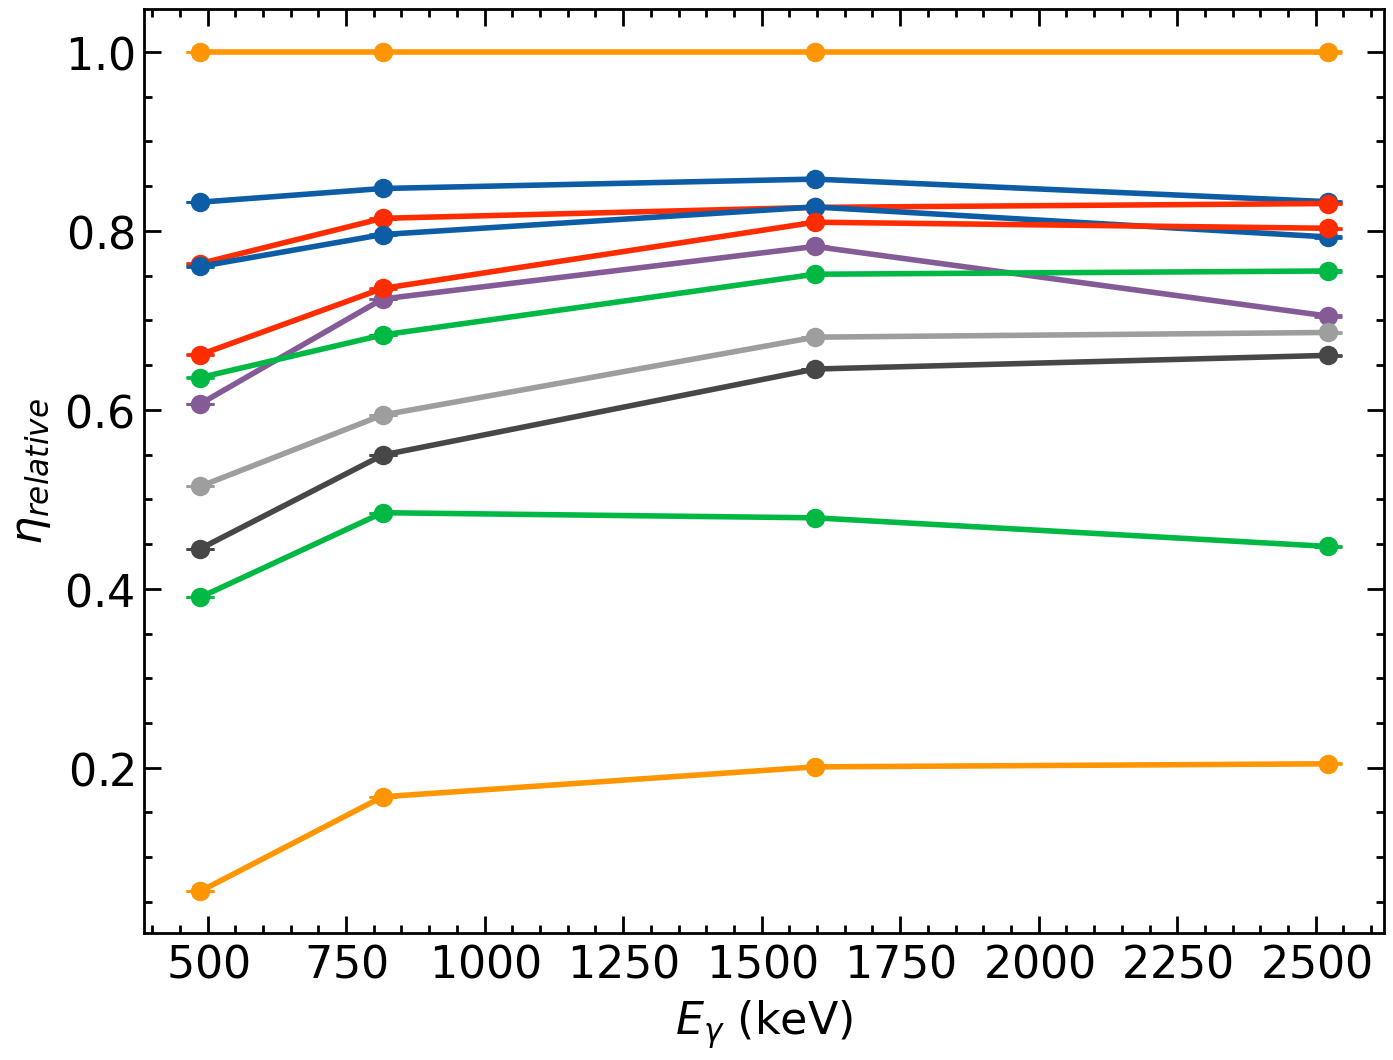

In [11]:
gammas = [487.021,815.772,1596.210,2521.40]

for i in range(32):
    if integral1_norm[i] == 0:
        continue

    integral_norm = np.array([integral1_norm[i],integral2_norm[i],integral3_norm[i],integral4_norm[i]])
    error_norm = np.array([error1_norm[i],error2_norm[i],error3_norm[i],error4_norm[i]])
    
    
    # plt.plot(gammas,integral_norm,"-o")
    plt.errorbar(gammas, integral_norm, yerr=error_norm, fmt="-o", capsize=5)

# plt.title("Relative Efficiency by Detector")
# plt.grid(True)
plt.xlabel('$E_\gamma$ (keV)')
plt.ylabel('$\eta_{relative}$')
plt.show()

In [12]:
canvas_list = []
hist_list = []
hist_list_bkgsub = []

hEgam_dict = hists.get("hEgam")
# hEgam_dict = hists.get("hEgam_coin0")
# hEgam_dict = hists.get("hEgam_coin1")


for i, key in enumerate(hEgam_dict):
    
    if integral4_norm[i] == 0:
        continue
    
    
    c = ROOT.TCanvas()
    hist  = hEgam_dict[key]
    hist_scaled = hist.Clone()
    hist_scaled.GetXaxis().SetRangeUser(1200,5200)
    hist_scaled.Scale(1/integral4_norm[i])
    
    

    hist_scaled_bkg = hist_scaled.ShowBackground(20,"same")
    hist_scaled_bkg.SetName(hist_scaled.GetName()+"_bkg")
    
    # hist_scaled.Sumw2()
    # hist_scaled_bkg.Sumw2()
    
    hist_scaled_bkgsub = hist_scaled - hist_scaled_bkg
    hist_scaled_bkgsub.SetName(hist_scaled.GetName()+"_bkgsub")
    
    hist_scaled_bkgsub.Draw("LF2")
    # hist_scaled_bkgsub.Draw("")
    hist_scaled.Draw("same")
    hist_scaled_bkg.Draw("same l")
    # hist_scaled_bkg.Draw("same")

    hist_scaled_bkgsub.SetFillStyle(3001);
    hist_scaled_bkgsub.SetFillColor(ROOT.kBlue);
    
    hist_list.append(hist_scaled)
    hist_list_bkgsub.append(hist_scaled_bkgsub)

    
    # ROOT.gROOT.GetListOfCanvases().Draw()
    
# ROOT.gROOT.GetListOfCanvases().Draw()
    
    

In [13]:

gamma_rays = {'5161':[5140,5180],
              '4843':[4780,4860],
              "4503":[4280,4350],
              '3822':[3790,3834],
              "1778":[1760,1790]
              }

# angle_list = np.array([71,90,109,71,90,90,90,109,71,144,90])

# integral_list = []
# for i, hist in enumerate(hist_list_bkgsub):
#     axis = hist.GetXaxis()
#     integral = hist.Integral(axis.FindBin(gamma_rays['5161'][0]),axis.FindBin(gamma_rays['5161'][1]))
#     integral_list.append(integral)

In [14]:
# angle_list = np.cos(angle_list * np.pi/180)
# integral_list

# error = np.sqrt(integral_list)

In [15]:
# TODO: apply efficiency correction after integral


def calculate_integral(hist_list_bkgsub, region):
    """"""
    angle_list = np.array([71,90,109,71,90,90,90,109,71,144,90])
    integral_list = []
    error_list = []
    
    for j, hist in enumerate(hist_list_bkgsub):
        bin0 = hist.GetXaxis().FindBin(region[0])
        bin1 = hist.GetXaxis().FindBin(region[1])
        
        
        integral = hist.Integral(bin0, bin1)
        integral_list.append(integral)
        
        integralUncertainty = 0.0
        for i in range(bin0, bin1 + 1):  # +1 to include the bin2 in the loop
            binError = hist.GetBinError(i)
            integralUncertainty += binError * binError

        error = ROOT.TMath.Sqrt(integralUncertainty)
            
        
        
        error_list.append(error)
        
    angle_list = np.cos(angle_list * np.pi/180)

    # error = np.sqrt(integral_list)
    
    return angle_list, integral_list, error


def calculate_norm(x,y,yerr):

    # Create a DataFrame
    df = pd.DataFrame({'x': x, 'y': y, 'yerr': yerr})

    # Group by x and compute the mean for y
    # averaged = df.groupby('x').agg({'y': 'mean'}).reset_index()
    averaged = df.groupby('x').agg({'y': 'mean', 'yerr': lambda err: np.sqrt(np.mean(err**2)/len(err))}).reset_index()


    x = averaged['x'].values
    y = averaged['y'].values
    yerr = averaged['yerr'].values

    y_norm = y/np.max(y)
    yerr_norm = yerr/np.max(y)
    
    # y_norm = y *100
    # yerr_norm = yerr*100
    
    return x, y_norm, yerr_norm




    

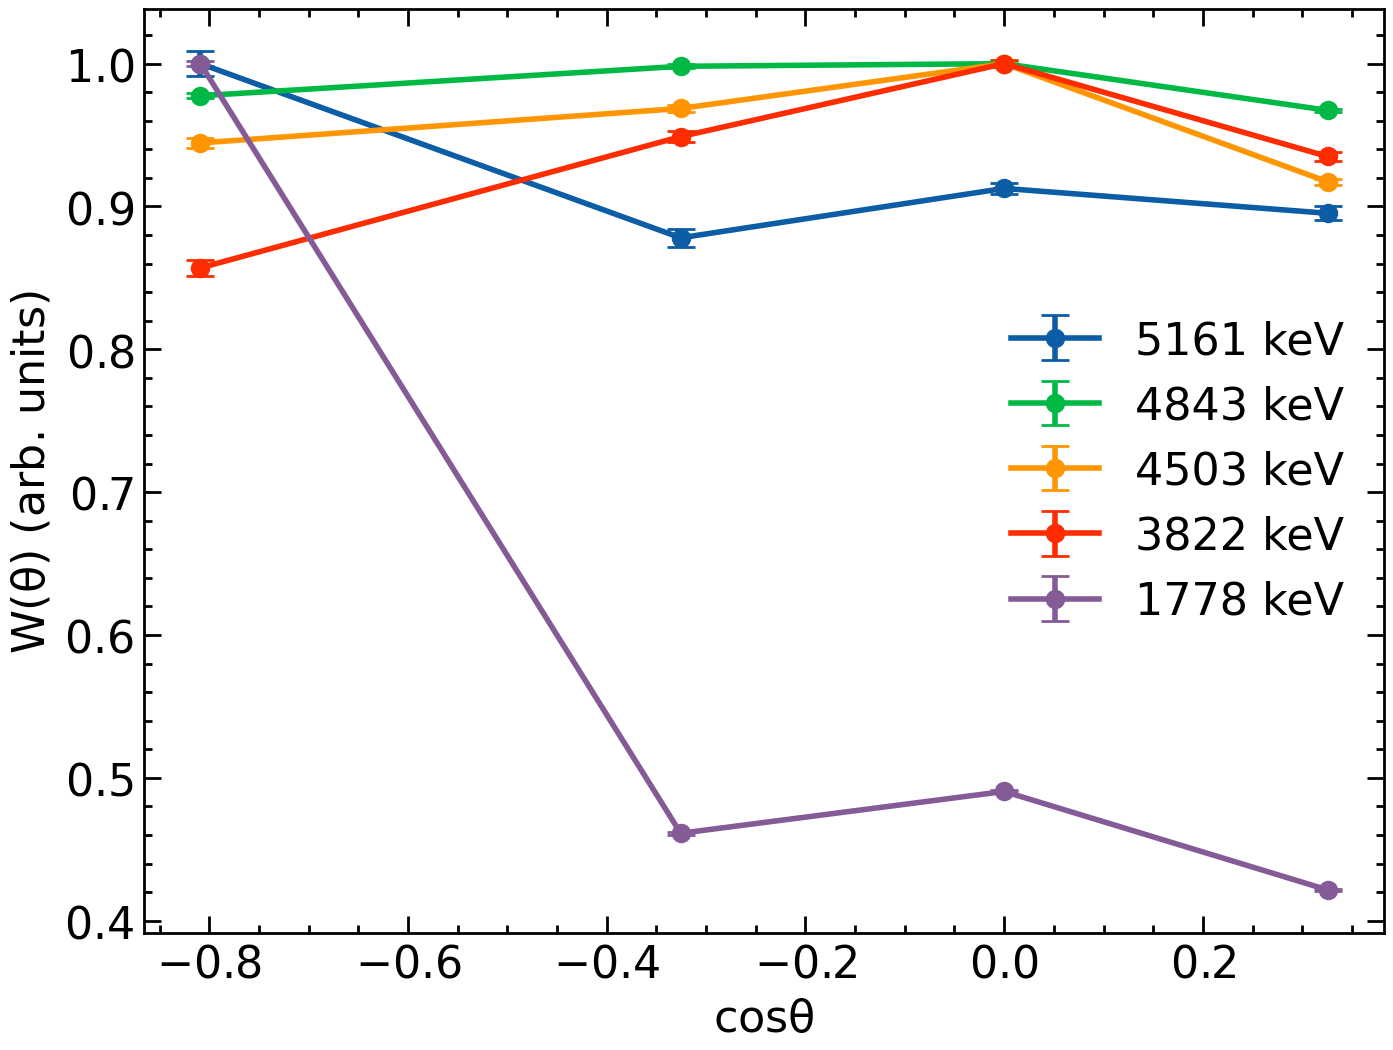

In [16]:
x_list=[]
y_list=[]
yerr_list=[]
labels = []

for key, region in gamma_rays.items():
    x, y, yerr = calculate_norm(*calculate_integral(hist_list_bkgsub, region))
    plt.errorbar(x, y, yerr = yerr, fmt = "-o", capsize = 5, label = key+' keV')


# plt.tight_layout()

plt.ylabel('$\mathrm{W(\\theta)}$ (arb. units)')
plt.xlabel('$\mathrm{cos\\theta}$')
plt.legend()
plt.show()

    

In [17]:
# # plt.scatter(angle_list,integral_list)
# plt.errorbar(angle_list, integral_list, yerr=error, fmt="o", capsize=5)

In [24]:
def W(x, C, A_2, A_4):
    return C * (1 + A_2 * 1 / 2 *(3 * x**2 - 1) + A_4 * 1/8 * (35 * x**4 - 30 * x**2 + 3))

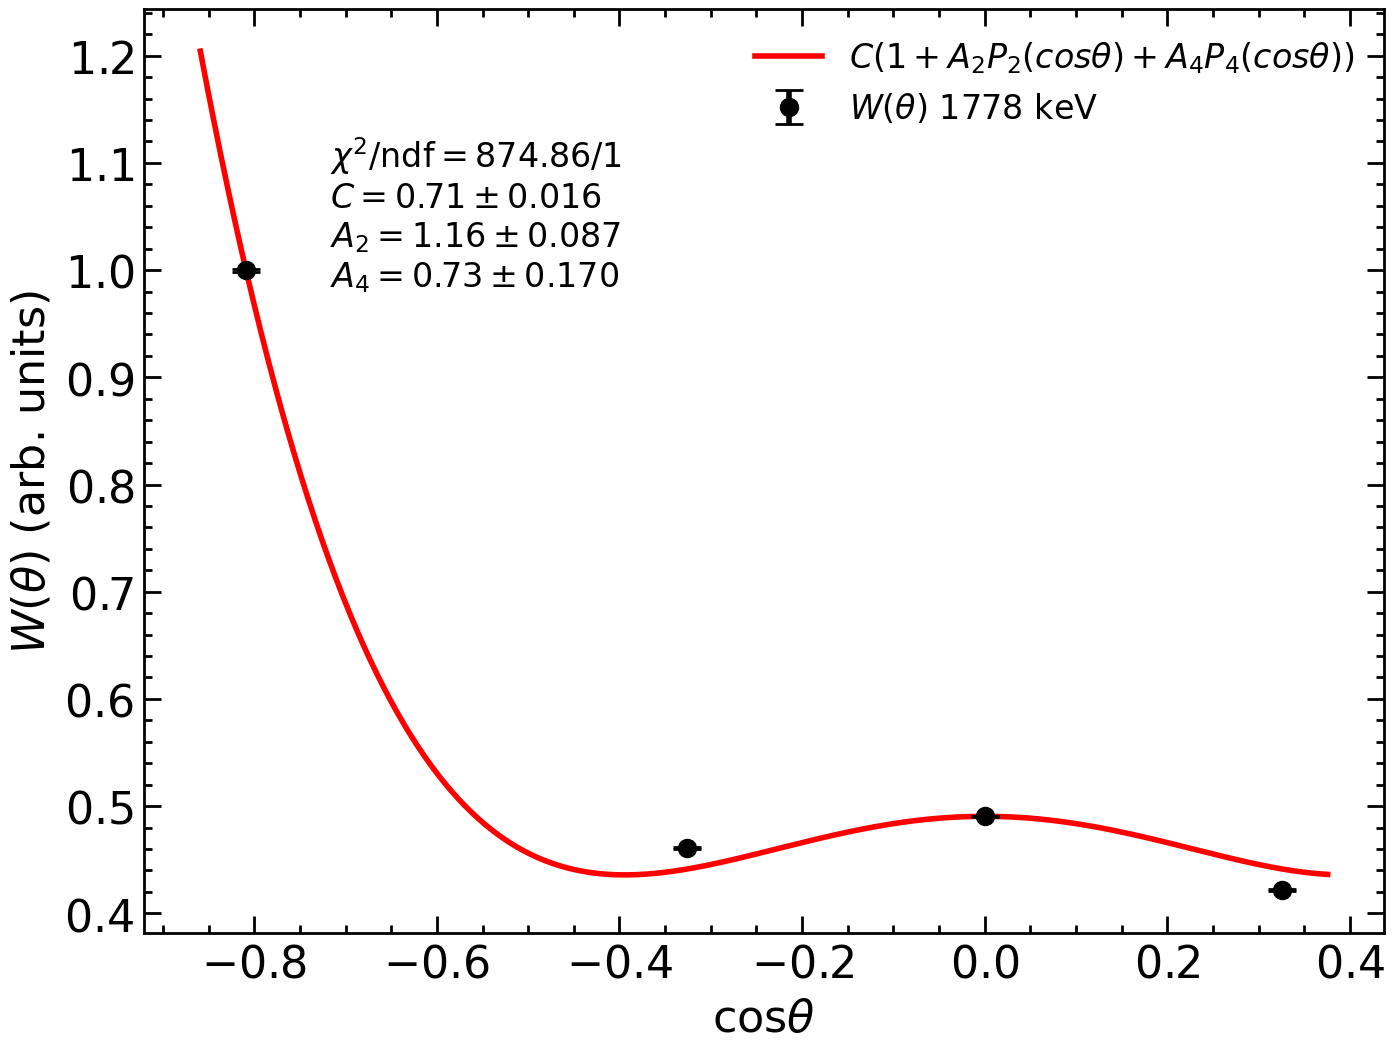

In [19]:
gamma = "1778"
x, y, yerr = calculate_norm(*calculate_integral(hist_list_bkgsub, gamma_rays[gamma]))

plt.figure()




# plt.title('$W(\\theta)$ '+ gamma + " keV and Fit")
plt.ylabel('$W(\\theta)$ (arb. units)')
plt.xlabel('$\mathrm{cos}\\theta$')


params, covariance = curve_fit(W, x, y)
params_error = np.sqrt(np.diag(covariance))
x_fit = np.linspace(min(x)-0.05, max(x)+0.05, 500)
y_fit = W(x_fit, *params)

plt.plot(x_fit, y_fit, color = 'red', label='$C ( 1+ A_2 P_2(cos\\theta) + A_4 P_4(cos\\theta))$')
plt.errorbar(x, y, yerr=yerr,color = 'black', linestyle='', marker='o', capsize=5, label='$W(\\theta)$ '+ gamma + " keV")


legend = plt.legend(fontsize=plt.gca().xaxis.label.get_size()-4)


y_expected = W(x, *params)
residuals = y - y_expected
chi_squared = np.sum((residuals / yerr)**2)
ndof = len(y) - len(params)
chi_squared_per_ndof = chi_squared / ndof

# plt.tight_layout()

def add_stats_box(params, params_error, chi_squared, ndof):
    
    
    stats_text = (
        f"$\chi^2/\mathrm{{ndf}} = {chi_squared:.2f}/{ndof}$\n"
        f"$C = {params[0]:.2f} \pm {params_error[0]:.3f}$ \n"
        f"$A_2 = {params[1]:.2f} \pm {params_error[1]:.3f} $\n"
        f"$A_4 = {params[2]:.2f} \pm {params_error[2]:.3f} $"
    )
    
    
    bbox_params =bbox=dict(alpha=0, boxstyle='round', 
                           facecolor=legend.get_frame().get_facecolor(), 
                           edgecolor=legend.get_frame().get_edgecolor())
    
    
    plt.annotate(stats_text, xy=(0.15, 0.7), xycoords='axes fraction', 
                 fontsize=plt.gca().xaxis.label.get_size()-4, bbox=bbox_params)


add_stats_box(params, params_error, chi_squared, ndof)
# plt.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()


In [23]:
# %jsroot on
# gamma = "4503"
# x, y, yerr = calculate_norm(*calculate_integral(hist_list_bkgsub, gamma_rays[gamma]))

# fitFunc = ROOT.TF1("W(cos#theta)", "[0] * (1 + [1] * 1 / 2 *(3 * x**2 - 1) + [2] * 1/8 * (35 * x**4 - 30 * x**2 + 3))")
# fitFunc.SetParNames('C','A_2','A_4')
# graph = ROOT.TGraphErrors(len(x), x, y, 0, yerr)
# graph.SetTitle("^{139}La " + gamma + " keV")
# # graph.SetTitle("")
# graph.GetXaxis().SetTitle("cos#theta")
# graph.GetYaxis().SetTitle('W(#theta) (arb. units)')
# graph.SetMarkerStyle(20)
# graph.Fit("W(cos#theta)",'q')
# # ROOT.gStyle.SetOptFit(1)

# leg = ROOT.TLegend()
# leg.AddEntry(graph, "W(#theta) " + gamma + " " + "keV")
# leg.AddEntry(fitFunc,"C ( 1+ A_{2} P_{2}(cos#theta) + A_{4} P_{4}(cos#theta))")


# c = ROOT.TCanvas()
# graph.Draw("AP")

# leg.Draw()
# c.Draw()

In [21]:
# x = [-8.09016994e-01,-3.25568154e-01 ,6.12323400e-17 ,3.25568154e-01]



# y = [82452.50323746, 72397.0466392, 75250.09063611, 73814.54559106]
# yerr = [287.14543917, 190.25909523, 122.67851534, 156.8593272 ]


# y_coin0 = [70999.17837287, 62109.34059401, 63956.03865656, 63193.83826644]
# yerr_coin0 = [266.45671013, 176.22335344, 113.09822161, 145.13653143]


# y_coin1 = [14622.06958965, 10428.70065758, 11613.13663631, 10820.20841643]
# yerr_coin1 = [120.92174986, 72.21045858, 48.19364405, 60.05610826]


# plt.errorbar(x, y, yerr=yerr, linestyle='-', marker='o', capsize=5, color = 'red', label = "All")
# plt.errorbar(x, y_coin0, yerr=yerr_coin0, linestyle='-', marker='o', capsize=5, color = 'blue', label = "no coincidence" )
# plt.errorbar(x, y_coin1, yerr=yerr_coin1, linestyle='-', marker='o', capsize=5, color = 'Black', label = "coincidence")


# plt.title("$W(\\theta)$ $^{139}$La 5161 keV")
# plt.legend()
# plt.grid(True)
# plt.ylabel('Counts')
# plt.xlabel('$cos(\\theta)$')

In [22]:
# x = [-8.09016994e-01,-3.25568154e-01 ,6.12323400e-17 ,3.25568154e-01]

# y = [1.0,0.87804547,0.91264774,0.89523717]
# yerr = [0.00348256, 0.0023075, 0.00148787, 0.00190242]

# y_coin0 = [1.0,         0.87478957,0.9007997 ,0.89006436]
# yerr_coin0 = [0.00375295,0.00248205,0.00159295,0.0020442 ]

# y_coin1 = [1.0, 0.71321646, 0.79421976, 0.73999158]
# yerr_coin1 = [0.00826981, 0.00493846, 0.00329595, 0.00410722]


# plt.errorbar(x, y, yerr=yerr, linestyle='-', marker='o', capsize=5, color = 'red', label = "All")
# plt.errorbar(x, y_coin0, yerr=yerr_coin0, linestyle='-', marker='o', capsize=5, color = 'blue', label = "no coincidence" )
# plt.errorbar(x, y_coin1, yerr=yerr_coin1, linestyle='-', marker='o', capsize=5, color = 'Black', label = "coincidence")


# plt.title("$W(\\theta)$ $^{139}$La 5161 keV Normalized")
# plt.legend()
# plt.grid(True)
# plt.ylabel('Arbitrary Units [A.U.]')
# plt.xlabel('$cos(\\theta)$')
# 1
